# Lab02

## Question1: SIFT(Scale Invariant Feature Transform)

Import lib and self-design function

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# read the image 
img = cv2.imread('syd_house.jpg')
# convert img to gary image
gary = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def rotate_bound(image, angle):
    (h, w) = image.shape[:2] 
    # angle coressponding to anti-clockwise
    M = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1.0)
    # count new bound
    newW = int((h * np.abs(M[0, 1])) + (w * np.abs(M[0, 0])))
    newH = int((h * np.abs(M[0, 0])) + (w * np.abs(M[0, 1])))
    M[0, 2] += (newW - w) / 2
    M[1, 2] += (newH - h) / 2
    # renturn the rotate image
    return cv2.warpAffine(image, M, (newW, newH)) 

### TASK 01: Compute SIFT features

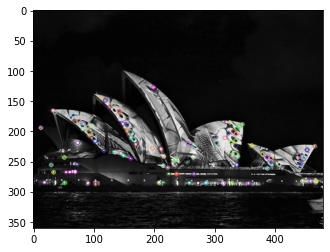

In [4]:
def extract_and_showKeypoints(image, gary_image):
    # construct a SIFT object
    sift = cv2.xfeatures2d.SIFT_create(contrastThreshold = 0.214)
    # sift = cv2.xfeatures2d.SIFT_create(contrastThreshold = 0.25)
    # Extract SIFT features with default parameters
    keypoints, descriptors = sift.detectAndCompute(gary_image, None)
    # print(len(keypoints)) # 703 * 1/4 = 175.75
    # draws keypoints to the image
    img_task = cv2.drawKeypoints(gary_image, keypoints, image)
    return keypoints, img_task, descriptors

keypoints1, img_task1, descriptors1 = extract_and_showKeypoints(img, gary)
cv2.imwrite('img_task1.jpg', img_task1)
# plot the image
plt.imshow(img_task1, cmap='gray', vmin=0, vmax=255)

### Task 02:Rotate the image and compute the SIFT features again


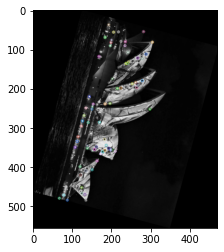

In [5]:
# Rotate the image anti-clockwise by 255 degrees
img_task2 = rotate_bound(img, 255)
gary_image_task2 = cv2.cvtColor(img_task2, cv2.COLOR_BGR2GRAY)

keypoints2, img_task2, descriptors3 = extract_and_showKeypoints(img_task2, gary_image_task2)
cv2.imwrite('img_task2.jpg', img_task2)
# plot the image
plt.imshow(img_task2, cmap='gray', vmin=0, vmax=255)

1. The image in Task01 looks roughly the same as the one in Task02. 
2. This will imply that rotating image will not change the result of SIFT.
3. SIFT is a local feature and only extracts the sample of the rectangular area near the key point, so the feature extracted by the object is similar to any place. At the same time, because the grid is drawn to extract, even if the key points are slightly offset, the feature is basically unchanged

### Task03: Test rotational invariance of SIFT features


In [6]:

def Flann_match(angle, image_name):
    # Rotate the image anti-clockwise by 60 degrees
    img3 = rotate_bound(img, angle)
    gary_image_task3= cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
    # Compute SIFT features and draw keypoints
    keypoints3, img_task3, descriptors3 = extract_and_showKeypoints(img3, gary_image_task3)
    '''
    match SIFT features with the ori on ratio method
    '''
    # FLANN matcher
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors1, descriptors3, k = 2)
    # create a mask to select only good matches
    matchesMask = [[0, 0] for i in range(len(matches))]

    # apply ratio test
    for i, (m, n) in enumerate(matches):
        if m.distance < 0.5 * n.distance:
            matchesMask[i] = [1, 0]

    draw_params = dict(matchColor = (0, 255, 0),
                        singlePointColor = (0, 255, 0),
                        matchesMask = matchesMask,
                        flags = cv2.DrawMatchesFlags_DEFAULT)

    img_result = cv2.drawMatchesKnn(img, keypoints1, img3, keypoints3, matches, None, **draw_params)


    cv2.imwrite(image_name, img_result)
    # plot the image
    plt.imshow(img_result, cmap='gray', vmin=0, vmax=255)


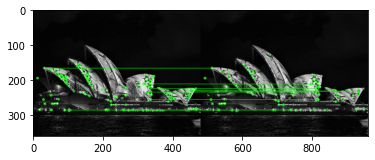

In [7]:
'''
0 degrees
'''
Flann_match(0, 'image_task_0_degree.jpg')

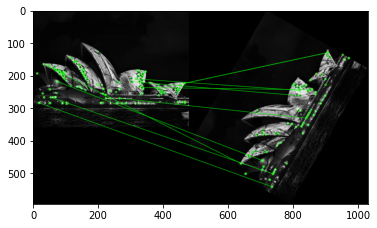

In [8]:
'''
60 degrees
'''
Flann_match(60, 'image_task_60_degree.jpg')

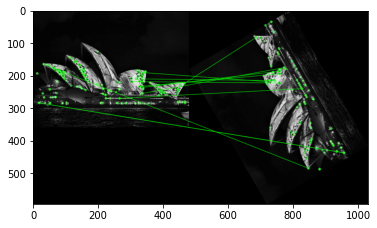

In [9]:
'''
120 degrees
'''
Flann_match(120, 'image_task_120_degree.jpg')